## Descriptive Statistics
## date: 21/10/2020
## Haifaa Alzahran

## Theoretical Probability Distribution
It is empirical frequency distribution (on the sample = dataset), which reflects the distributions of a variable that we observe in a given sample.


In [12]:
# Import packages
import math
import pandas as pd # For DataFrame 
import numpy as np # Array and numerical processing
import matplotlib.pyplot as plt # Low level plotting
import seaborn as sns # High level Plotting

pd.set_option('display.max_columns', 999)
low_memory=False

In [13]:
# Read the dataset
books = pd.read_csv("~/MISK_DSI/R/DS_Research_GoodreadsBooks/Data/full_books.csv")

In [14]:
# Overview on descriptive statistics
books.describe()

,Unnamed: 0,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
count,11123.000000,11123.000000,11123.000000,11123.000000,1.112300e+04,11123.000000,11123.000000
mean,5561.000000,21310.856963,3.934075,336.405556,1.794285e+04,542.048099,2000.169019
std,3211.077856,13094.727252,0.350485,241.152626,1.124992e+05,2576.619589,8.247227
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1900.000000
25%,2780.500000,10277.500000,3.770000,192.000000,1.040000e+02,9.000000,1998.000000
50%,5561.000000,20287.000000,3.960000,299.000000,7.450000e+02,47.000000,2003.000000
75%,8341.500000,32104.500000,4.140000,416.000000,5.000500e+03,238.000000,2005.000000
max,11122.000000,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000,2020.000000


## Average rating distribution.
The average rating is normally distributed.

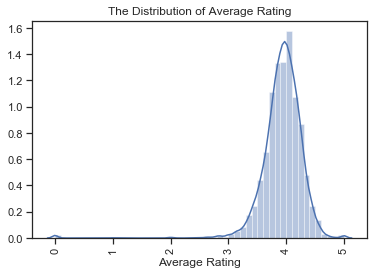

In [15]:
plt.title("The Distribution of Average Rating")
sns.distplot(books['average_rating'])
sns.set(style="white")
plt.xlabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

## Distribution of the number of pages


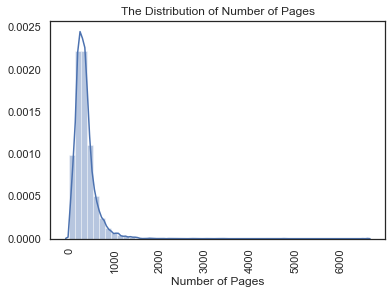

In [16]:
plt.title("The Distribution of Number of Pages")
sns.distplot(books['num_pages'])
sns.set(style="ticks")
plt.xlabel("Number of Pages")
plt.xticks(rotation=90)
plt.show()

## Is there any correlation among the data?
From the correlation matrix, we see a strong correlation between ratings_count and text_reviews_count, which is obvious because when someone write a review, he is more likley to rate the book.

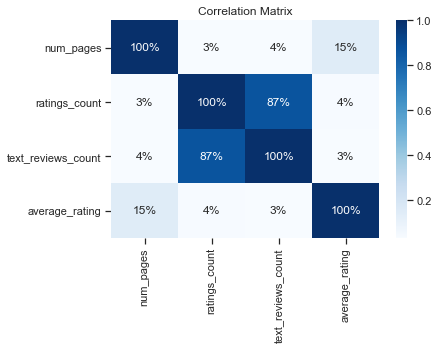

In [17]:
correlated = books[['num_pages', 'ratings_count', 'text_reviews_count', 'average_rating']]
plt.title("Correlation Matrix")
sns.heatmap(correlated.corr(),annot=True, fmt='.0%',cmap="Blues")
plt.show()

## Can we predict the number of ratings given the number of number of pages?
We plot a regression graph to understand the relationship between number of pages and number of ratings. 

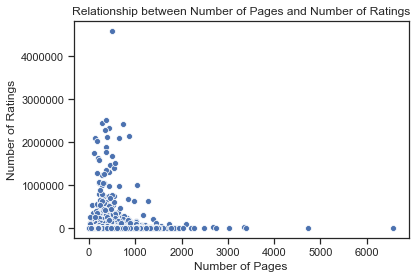

In [18]:
plt.title("Relationship between Number of Pages and Number of Ratings")
sns.scatterplot(x=books['num_pages'],y=books['ratings_count'])
plt.xlabel("Number of Pages")
plt.ylabel("Number of Ratings")
plt.show()

In [19]:
books[books.ratings_count > 4000000]

,Unnamed: 0,bookID,title,authors,average_rating,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre_and_votes,awards
9967,9967,41865,Twilight (Twilight #1),NaN,3.59,316015849,eng,501,4597666,94265,2006,Little Brown and Company,NaN,NaN


In [20]:
books[books.num_pages > 1000].count().isbn

217

It seems that the book with less than 1000 pages, has more chance to be read and rated. 

Twilight has an exceptional number of ratings compared to others!

Also, we have little number of observations (only 217) for the books with more than 1000 pages which make it harder to predict their popularity or number of ratings.